In [1]:
import numpy as np

def SGD(f, grad_f, X, Y, Theta0, lr=1e-2, batch_size=32, epochs=10):
    """
    Simplified Stochastic Gradient Descent (SGD) implementation.
    f: loss function, grad_f: gradient wrt Theta
    X, Y: dataset
    Theta0: initial parameters
    lr: learning rate
    """
    Theta = Theta0.copy()
    N = len(X)
    for epoch in range(epochs):
        # Shuffle data indices
        idx = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = idx[start:start+batch_size]
            grad = grad_f(Theta, X[batch_idx], Y[batch_idx])
            Theta -= lr * grad
    return Theta

In [2]:
import numpy as np
import pandas as pd

# Load the dataset (download from Kaggle first)
df = pd.read_csv("data/train.csv")

# Select some useful continuous features
features = ["LotArea", "OverallQual", "YearBuilt"]
X = df[features].values
Y = df["SalePrice"].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)
Y = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])
N, d = X.shape
print(f"Dataset size: {N} samples, {d} features (including bias)")

Dataset size: 1460 samples, 4 features (including bias)


In [3]:
def l(Theta, X, Y):
    N = len(Y)
    residuals = X @ Theta - Y
    return (residuals**2).mean()

def grad_l(Theta, X, Y):
    N = len(Y)
    return (2/N) * X.T @ (X @ Theta - Y)

def gradient_descent(l, grad_l, Theta0, X, Y, lr=1e-3, epochs=500):
    Theta = Theta0
    losses = []
    for k in range(epochs):
        grad = grad_l(Theta, X, Y)
        Theta -= lr * grad
        losses.append(l(Theta, X, Y))
    return Theta, losses

In [4]:
def sgd(l, grad_l, Theta0, X, Y, batch_size=64, lr=1e-3, epochs=500):
    Theta = Theta0
    N = len(Y)
    losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb, Yb = X[batch_idx], Y[batch_idx]
            grad = grad_l(Theta, Xb, Yb)
            Theta -= lr * grad
        losses.append(l(Theta, X, Y))
    return Theta, losses

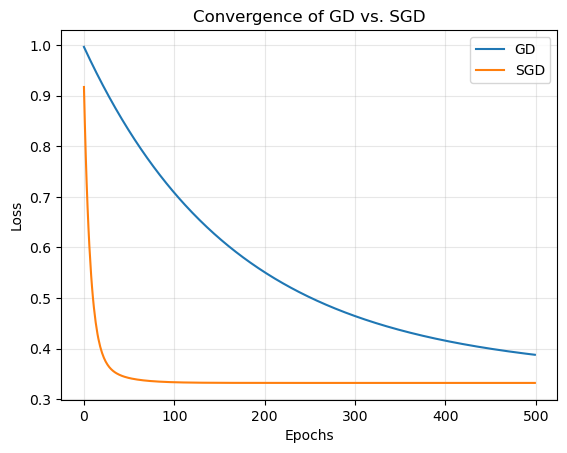

In [5]:
# Run both GD and SGD
Theta_gd, loss_gd = gradient_descent(l, grad_l, np.zeros((X.shape[1], 1)), X, Y,lr=1e-3, epochs=500)
Theta_sgd, loss_sgd = sgd(l, grad_l, np.zeros((X.shape[1], 1)), X, Y, batch_size=64, lr=1e-3, epochs=500)

import matplotlib.pyplot as plt
plt.plot(loss_gd, label="GD")
plt.plot(loss_sgd, label="SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence of GD vs. SGD")
plt.grid(alpha=0.3)
plt.show()

In [6]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("data/train.csv")

# Select features
features = ["LotArea", "OverallQual", "YearBuilt"]
X = df[features].values
Y = df["SalePrice"].values.reshape(-1, 1)

# Normalize the data
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
Y_mean, Y_std = Y.mean(), Y.std()

X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

# Add bias column
X = np.hstack([np.ones((X.shape[0], 1)), X])
N, d = X.shape

def l(Theta, X, Y):
    residuals = X @ Theta - Y
    return (residuals**2).mean()

def grad_l(Theta, X, Y):
    N = len(Y)
    return (2/N) * X.T @ (X @ Theta - Y)

In [7]:
def adam(l, 
        grad_l,
        Theta0, 
        X, Y, 
        beta1=0.9, beta2=0.999, eps=1e-8,
        batch_size=64, 
        lr=1e-3, 
        epochs=500):
    N, d = X.shape
    Theta = Theta0.copy()

    m = np.zeros_like(Theta)
    v = np.zeros_like(Theta)
    t = 0
    losses = []

    for epoch in range(epochs):
        idx = np.random.permutation(N)

        for start in range(0, N, batch_size):
            batch_idx = idx[start:start+batch_size]
            Xb, Yb = X[batch_idx], Y[batch_idx]
            g = grad_l(Theta, Xb, Yb)

            # Adam updates
            t += 1
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g * g)
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            Theta -= lr * (m_hat / (np.sqrt(v_hat) + eps))

        losses.append(l(Theta, X, Y))

    return Theta, losses

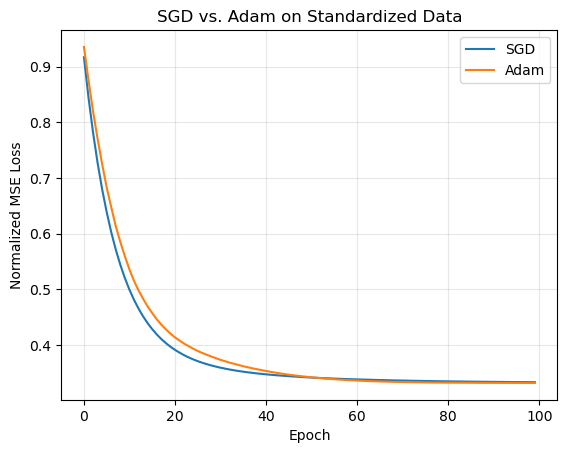

In [8]:
# Train both
Theta_sgd, loss_sgd = sgd(l, grad_l, np.zeros((X.shape[1], 1)), X, Y, batch_size=64, lr=1e-3, epochs=100)
Theta_adam, loss_adam = adam(l, grad_l, np.zeros((X.shape[1], 1)), X, Y, lr=1e-3, batch_size=64, epochs=100)

import matplotlib.pyplot as plt
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Normalized MSE Loss")
plt.title("SGD vs. Adam on Standardized Data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()